## __3. Dimensionality Reduction and Over Sampling__

### 3.0 Prepare the dataset for modelling

Load the dataset from .csv file:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
br=pd.read_csv('Bankruptcy.csv')

In [3]:
br.head()

,Unnamed: 0,Bankrupt?,Operating Gross Margin,Operating Profit Rate,After-tax net Interest Rate,Non-industry income and expenditure to revenue,Cash flow rate,Tax rate (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0,1,0.601457,0.998969,0.808809,0.302646,0.458143,0.0,0.147950,0.169141,...,0.520382,0.312905,0.118250,0,0.716845,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,1,0.610235,0.998946,0.809301,0.303556,0.461867,0.0,0.182251,0.208944,...,0.567101,0.314163,0.047775,0,0.795297,0.623652,0.839969,0.264577,0.570175,0.020794
2,2,1,0.601450,0.998857,0.808388,0.302035,0.458521,0.0,0.193713,0.180581,...,0.538491,0.314515,0.025346,0,0.774670,0.623841,0.836774,0.026555,0.563706,0.016474
3,3,1,0.583541,0.998700,0.808966,0.303350,0.465705,0.0,0.154187,0.193722,...,0.604105,0.302382,0.067250,0,0.739555,0.622929,0.834697,0.026697,0.564663,0.023982
4,4,1,0.598783,0.998973,0.809304,0.303475,0.462746,0.0,0.167502,0.212537,...,0.578469,0.311567,0.047725,0,0.795016,0.623521,0.839973,0.024752,0.575617,0.035490


Remove the first column `Unnamed:0`:

In [4]:
br=br.iloc[:,1:]
br.head()

,Bankrupt?,Operating Gross Margin,Operating Profit Rate,After-tax net Interest Rate,Non-industry income and expenditure to revenue,Cash flow rate,Tax rate (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.601457,0.998969,0.808809,0.302646,0.458143,0.0,0.147950,0.169141,0.311664,...,0.520382,0.312905,0.118250,0,0.716845,0.622879,0.827890,0.026601,0.564050,0.016469
1,1,0.610235,0.998946,0.809301,0.303556,0.461867,0.0,0.182251,0.208944,0.318137,...,0.567101,0.314163,0.047775,0,0.795297,0.623652,0.839969,0.264577,0.570175,0.020794
2,1,0.601450,0.998857,0.808388,0.302035,0.458521,0.0,0.193713,0.180581,0.307102,...,0.538491,0.314515,0.025346,0,0.774670,0.623841,0.836774,0.026555,0.563706,0.016474
3,1,0.583541,0.998700,0.808966,0.303350,0.465705,0.0,0.154187,0.193722,0.321674,...,0.604105,0.302382,0.067250,0,0.739555,0.622929,0.834697,0.026697,0.564663,0.023982
4,1,0.598783,0.998973,0.809304,0.303475,0.462746,0.0,0.167502,0.212537,0.319162,...,0.578469,0.311567,0.047725,0,0.795016,0.623521,0.839973,0.024752,0.575617,0.035490


Define the predictor matrix and the target variable:

In [5]:
X = br.iloc[:,1:]
y = br['Bankrupt?']

Import machine learning libraries:

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline

from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

### 3.1 Dimensionality reduction

Our dataset is high dimensional with 57 features. When we keep adding features without increasing the number of training samples as well, the dimensionality of the feature space grows and becomes sparser and sparser. Due to this sparsity, it becomes much easier to find a “perfect” solution for the machine learning model which highly likely leads to overfitting. Besides, even after careful data cleaning, many of these features are still correlated hence redundant, and high dimensionality means high computational cost as well. Therefore, we perform dimensionality reduction to reduce the number of attributes while keeping as much of the variation in the original dataset as possible.  
Two dimensionality reduction techniques are tested:
- __Principal Component Analysis (PCA)__: Constructing principal components that represent the directions of the data that explain a maximal amount of variance
- __Truncated SVD__: a matrix factorization technique similar to PCA, excepting that the factorization for SVD is done on the data matrix, whereas for PCA, the factorization is done on the covariance matrix.

The explained variance ratio of PCA and SVD with different number of components:

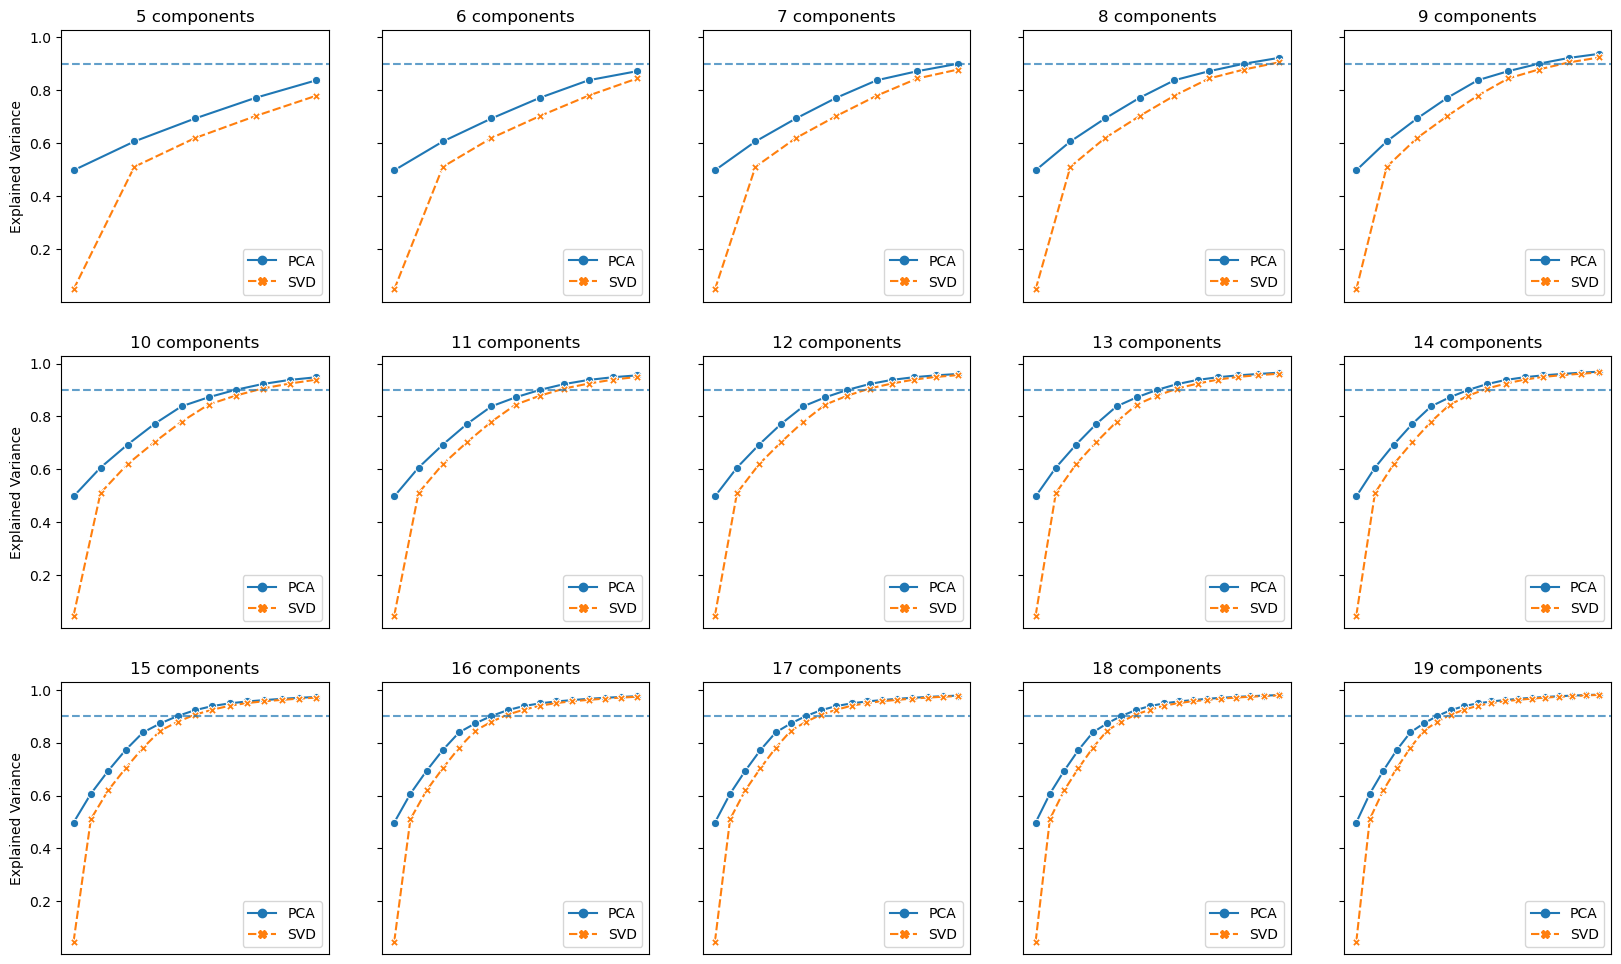

In [7]:
fig, axs = plt.subplots(3, 5, figsize=(20,12), sharey=True)

for n, ax in zip(np.arange(5,20), axs.ravel()):
    svd = TruncatedSVD(n_components=n, random_state=42).fit(X)
    pca = PCA(n_components = n).fit(X)
    pca_explained = np.cumsum(pca.explained_variance_ratio_)
    svd_explained = np.cumsum(svd.explained_variance_ratio_)
    df = pd.DataFrame(list(zip(pca_explained,svd_explained)), columns=['PCA','SVD'])
    sns.lineplot(df, markers=True, ax=ax)
    ax.axhline(y=0.9, alpha=0.7, linestyle='--')
    ax.set_xticks([])
    ax.set_ylabel('Explained Variance')
    ax.set_title('%.0d components' % n)
    ax.legend();
    
plt.savefig('PCA_SVD.png')

<font color ='green'>The explained variance ratio of both techniques exceeds 90% when the number of components reaches 8. At each number of component, the explained variance of PCA outperforms that of SVD. Therefore we choose PCA to reduce the dimensionality to 12 components.</font>

Train-test split:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Fit PCA and transform the data:

In [9]:
pca = PCA(n_components = 12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Save the PCA component matrix:

In [10]:
pca_comp = pca.components_

### 3.2 Oversampling

Our dataset is highly imbalanced, which can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as in our case the prediction on the minority class (Bankrupt) is the highest priority. One approach to addressing the problem of class imbalance is to oversample the training set.   
The performance of two oversampling techniques are tested:
- Synthetic Minority Oversampling Technique (__SMOTE__): selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line
- Oversample using Adaptive Synthetic(__ADASYN__): similar to SMOTE but will bias the sample space towards points which are located not in homogenous neighborhoods  
We keep the original training set (no oversampling) as a reference

SMOTE oversampling:

In [11]:
sm = SMOTE(random_state=42)
X_train_sm , y_train_sm = sm.fit_resample(X_train_pca, y_train)

ADASYN oversampling:

In [12]:
ada = ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train_pca, y_train)

The class distribution before and after oversampling:

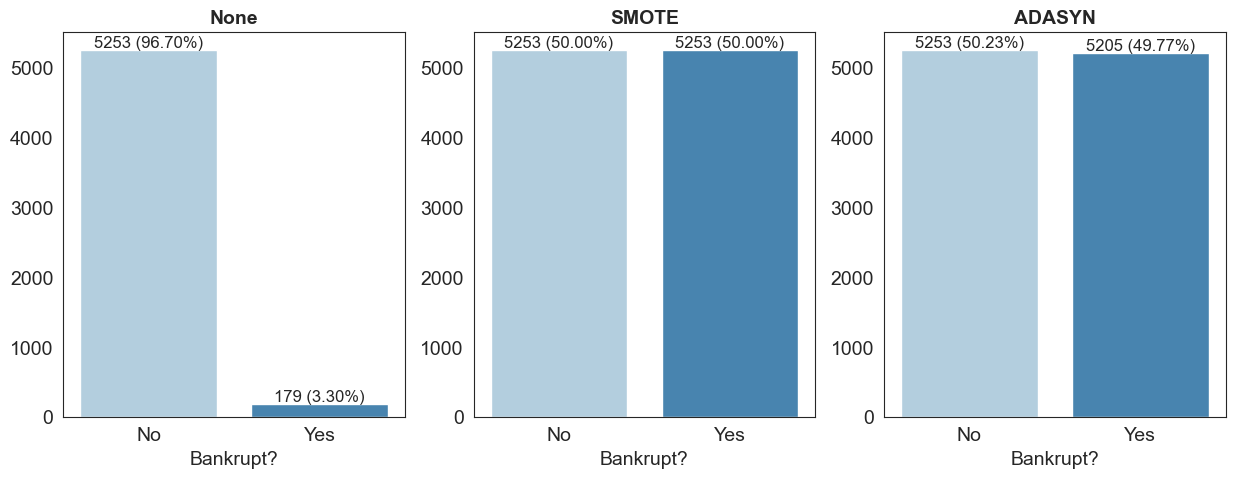

In [13]:
sns.set_style('white')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
y_ori = pd.DataFrame(y_train)
y_sm = pd.DataFrame(y_train_sm)
y_ada = pd.DataFrame(y_train_ada)

for y, label, ax in zip([y_ori, y_sm, y_ada],['None', 'SMOTE', 'ADASYN'], axs.ravel()):
    sns.countplot(y, x = 'Bankrupt?', palette='Blues', ax=ax)
    abs_values = y['Bankrupt?'].value_counts(ascending=False)
    rel_values = y['Bankrupt?'].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]
    ax.set_title(label, fontdict={'size':14, 'weight':'bold'})
    ax.set_xlabel('Bankrupt?', fontsize=14)
    ax.set_ylabel('')
    ax.set_xticklabels(['No','Yes'], fontsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.bar_label(container=ax.containers[0], labels=lbls, fontsize=12);
    
plt.savefig('smote_adasyn.png')

<font color='green'>After oversampling the dataset is balanced. The proportion of each class is approximately 50%.</font>

## 4. __Model Training and Evaluation__

The model training pipeline:

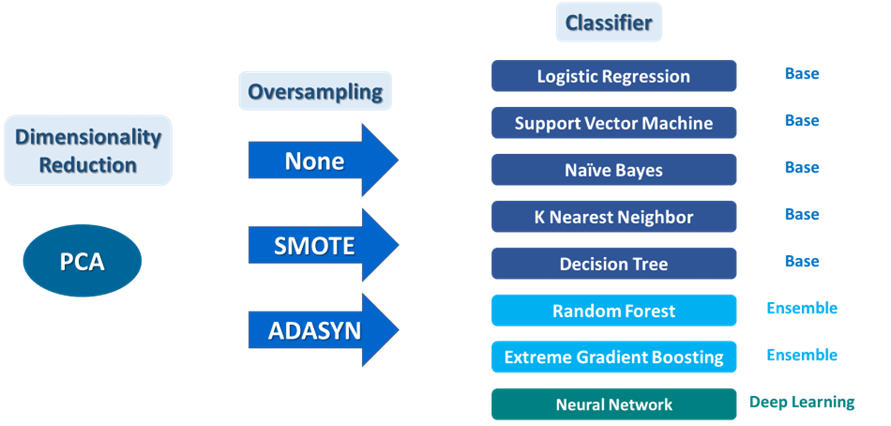

Eight classification models are employed to identify a company is bankrupty or not. Five of them are base models, two are ensemble models and the last one is a deep learning model:

Base models:

- **Logistic Regression (LR)**: computing the probability of a discrete outcome given an input variable
- **Support Vector machine classifier (SVC)**: mapping data to a high-dimensional feature space and looking for a hyperplane that separates the categories 
- **Naive Bayesian (NB)**: computing the conditional a posterior probabilities of a class variable of a given independent predictor variable
- **k Nearest Neighbor (KNN)**: classifing objects based on their proximate neighbors’ classes
- **Decision Trees (DT)**: classifying samples by sorting them down the tree

Ensemble models:
- **Random Forest (RF)**: building decision trees on different samples and takeing their majority vote for classification
- **Extreme Gradient Boosting (XGB)**: an efficient implementation of the stochastic gradient boosting ensemble algorithm

Deep learning models:
- **Neural Network (NN)**: a feedforward and fully connected neural network for classification 

We use GridsearchCV to search for optimal hyperparameters.

### 4.0 Helper functions

Helper function for hyperparameter tuning using training pipeline and GridseearchCV:

In [14]:
def Tuning(clf, params):
    p0 = Pipeline([('pca', PCA(n_components=12)), ('clf', clf)])
    p1 = Pipeline([('pca', PCA(n_components=12)), ('over', SMOTE()), ('clf', clf)])
    p2 = Pipeline([('pca', PCA(n_components=12)), ('over', ADASYN()),('clf', clf)])

    for p, over in zip([p0, p1, p2], ['None', 'SMOTE', 'ADASYN']):
        GS = GridSearchCV(p, params, scoring = 'recall', cv=5, n_jobs=-1).fit(X_train, y_train)
        print(over)
        print("Best parameters:", GS.best_params_)
        print("Best score:", GS.best_score_)

<font color='red'>As mentioned before, recall is the most important performance metric. All hyperparameter tuning processes seek to achieve the highest __recall__ score.
We also calculate __accuracy__, __f1 score__ and __ROC_AUC__ (area under the receiver operating characteristic curve) for model evaluation.</font>

Helper function to calculate and plot the performance metrics:

In [15]:
# helper function to show results and charts
def show_summary_report(actual, prediction, probabilities, plot = False):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    f1_ = f1_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    if plot == False: 
        return (accuracy_, precision_, recall_, f1_, roc_auc_)
    else:   
        print('Accuracy : %.4f [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
        print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.               Best: 1, Worst: 0' % precision_)
        print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                            Best: 1, Worst: 0' % recall_)
        print('F1_score : %.4f [Precision * Recall / (Precision + Recall) ]                               Best: 1, Worst: 0' % f1_)
        print('ROC AUC  : %.4f                                                                            Best: 1, Worst: < 0.5' % roc_auc_)
        print('-' * 107)
        print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

        # Confusion Matrix
        mat = confusion_matrix(actual, prediction)

        # Precision/Recall
        precision, recall, _ = precision_recall_curve(actual, probabilities)
        average_precision = average_precision_score(actual, probabilities)
    
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(actual, probabilities)
        roc_auc = auc(fpr, tpr)


        # plot
        fig, ax = plt.subplots(1, 3, figsize = (18, 6))
        fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

        # Confusion Matrix
        conf_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
        conf_counts = ['{0:0.0f}'.format(value) for value in mat.ravel()]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(conf_names, conf_counts)]
        labels = np.array(labels).reshape(2,2)
        sns.heatmap(mat, square = True, annot = labels, fmt='', cbar = False, cmap = 'Blues', annot_kws={"size": 14}, ax = ax[0])

        ax[0].set_title('Confusion Matrix')
        ax[0].set_xlabel('Predicted label')
        ax[0].set_ylabel('True label')

    
        # Precision/Recall
        step_kwargs = {'step': 'post'}
        ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
        ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
        ax[1].set_ylim([0.0, 1.0])
        ax[1].set_xlim([0.0, 1.0])
        ax[1].set_xlabel('Recall')
        ax[1].set_ylabel('Precision')
        ax[1].set_title('2-class Precision-Recall curve')

        # ROC
        ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
        ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
        ax[2].set_xlim([0.0, 1.0])
        ax[2].set_ylim([0.0, 1.0])
        ax[2].set_xlabel('False Positive Rate')
        ax[2].set_ylabel('True Positive Rate')
        ax[2].set_title('Receiver Operating Characteristic')
        ax[2].legend(loc = 'lower right')
    
        return (accuracy_, precision_, recall_, f1_, roc_auc_)

Helper function to summarise the model scores:

In [16]:
def ScoreDF(mdls, clf_name):
    oversampling = ['None', 'SMOTE', 'ADASYN']
    scores = pd.DataFrame(columns = ['oversampling', 'classifier', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

    for mdl, over in zip(mdls, oversampling):
        pred = mdl.predict(X_test_pca)
        pred_prob = mdl.predict_proba(X_test_pca)[:,1]
        accuracy, precision, recall, f1, roc_auc = show_summary_report(y_test, pred, pred_prob)
        results = {'oversampling': over, 
                   'classifier': clf_name, 
                   'accuracy': accuracy, 
                   'precision':precision, 
                   'recall':recall, 
                   'f1': f1, 
                   'roc_auc':roc_auc}
        scores.loc[len(scores)] = results
    
    return(scores)

### 4.1 Hyperparameter tuning and model training

#### 4.1.0 Logistic regression (LR)

Hyperparameter tuning:

In [17]:
lr_params = {
    'clf__C': [1, 10, 100]
}

In [18]:
Tuning(LogisticRegression(max_iter = 2000, random_state = 42), lr_params)

None
Best parameters: {'clf__C': 100}
Best score: 0.1511111111111111
SMOTE
Best parameters: {'clf__C': 1}
Best score: 0.8552380952380952
ADASYN
Best parameters: {'clf__C': 1}
Best score: 0.8552380952380952


Model training:

In [31]:
lr = LogisticRegression(C=100, max_iter = 2000, random_state = 42).fit(X_train_pca, y_train)
lr_sm = LogisticRegression(max_iter = 2000, random_state = 42).fit(X_train_sm, y_train_sm)
lr_ada = LogisticRegression(max_iter = 2000, random_state = 42).fit(X_train_ada, y_train_ada)

Model scores:

In [32]:
lr_scores = ScoreDF([lr, lr_sm, lr_ada], 'Logistic Regression')
lr_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Logistic Regression,0.970545,0.461538,0.153846,0.230769,0.948718
1,SMOTE,Logistic Regression,0.865243,0.166667,0.923077,0.282353,0.952373
2,ADASYN,Logistic Regression,0.859352,0.163717,0.948718,0.279245,0.952120


#### 4.1.1 Support vector machine classifier (SVC)

Hyperparameter tuning:

In [21]:
svc_params = {
    'clf__C': [1, 10, 100],
    'clf__kernel': ['linear','rbf']
}

In [22]:
%%time
Tuning(SVC(probability=True, random_state=42), svc_params)

None
Best parameters: {'clf__C': 100, 'clf__kernel': 'rbf'}
Best score: 0.20634920634920634
SMOTE
Best parameters: {'clf__C': 10, 'clf__kernel': 'linear'}
Best score: 0.8606349206349206
ADASYN
Best parameters: {'clf__C': 1, 'clf__kernel': 'linear'}
Best score: 0.8719047619047618
CPU times: total: 25.4 s
Wall time: 3min 17s


Model training:

In [27]:
svc = SVC(C=100, probability=True, random_state=42).fit(X_train_pca, y_train)
svc_sm = SVC(C=10, kernel = 'linear', probability=True, random_state=42).fit(X_train_sm, y_train_sm)
svc_ada = SVC(C=1, kernel = 'linear', probability=True, random_state=42).fit(X_train_ada, y_train_ada)

Model scores:

In [28]:
svc_scores = ScoreDF([svc, svc_sm, svc_ada], 'Support Vector Machine')
svc_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Support Vector Machine,0.972018,0.526316,0.256410,0.344828,0.854396
1,SMOTE,Support Vector Machine,0.865243,0.163551,0.897436,0.276680,0.949398
2,ADASYN,Support Vector Machine,0.855670,0.157205,0.923077,0.268657,0.950215


#### 4.1.2 Naive bayes (NB)

Hyperparameter tuning: 

In [29]:
nb_params = {
    'clf__var_smoothing': np.logspace(0,-9, num=100)
}

In [30]:
Tuning(GaussianNB(), nb_params)

None
Best parameters: {'clf__var_smoothing': 0.0008111308307896872}
Best score: 0.13968253968253969
SMOTE
Best parameters: {'clf__var_smoothing': 0.15199110829529336}
Best score: 0.8382539682539683
ADASYN
Best parameters: {'clf__var_smoothing': 0.23101297000831597}
Best score: 0.8831746031746033


Model training:

In [33]:
nb = GaussianNB(var_smoothing = 0.000811).fit(X_train_pca, y_train)
nb_sm = GaussianNB(var_smoothing = 0.151991).fit(X_train_sm, y_train_sm)
nb_ada = GaussianNB(var_smoothing = 0.231013).fit(X_train_ada, y_train_ada)

Model scores:

In [34]:
nb_scores = ScoreDF([nb, nb_sm, nb_ada], 'Naive Bayes')
nb_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Naive Bayes,0.960972,0.230769,0.153846,0.184615,0.892265
1,SMOTE,Naive Bayes,0.795287,0.113269,0.897436,0.201149,0.915418
2,ADASYN,Naive Bayes,0.701767,0.082192,0.923077,0.150943,0.909955


#### 4.1.3 K nearest neighbor (KNN)

Hyper parameter tuning:

In [35]:
knn_params = {
    'clf__n_neighbors': np.arange(5,15)
}

In [36]:
Tuning(KNeighborsClassifier(), knn_params)

None
Best parameters: {'clf__n_neighbors': 5}
Best score: 0.10063492063492063
SMOTE
Best parameters: {'clf__n_neighbors': 13}
Best score: 0.7317460317460317
ADASYN
Best parameters: {'clf__n_neighbors': 14}
Best score: 0.7315873015873016


Model training

In [37]:
knn = KNeighborsClassifier(5).fit(X_train_pca, y_train)
knn_sm = KNeighborsClassifier(13).fit(X_train_sm, y_train_sm)
knn_ada = KNeighborsClassifier(14).fit(X_train_ada, y_train_ada)

Model scores:

In [38]:
knn_scores = ScoreDF([knn, knn_sm, knn_ada], 'k Nearest Neighbor')
knn_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,k Nearest Neighbor,0.972754,0.625000,0.128205,0.212766,0.767102
1,SMOTE,k Nearest Neighbor,0.865243,0.143564,0.743590,0.240664,0.875527
2,ADASYN,k Nearest Neighbor,0.866716,0.145000,0.743590,0.242678,0.871591


#### 4.1.4 Decision Tree (DT)

Hyperparameter tuning:

In [39]:
dt_params = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': np.arange(1,5)
}

In [40]:
Tuning(DecisionTreeClassifier(), dt_params)

None
Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': 4}
Best score: 0.03380952380952381
SMOTE
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 1}
Best score: 0.8047619047619048
ADASYN
Best parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 1}
Best score: 0.8607936507936508


Model training:

In [41]:
dt = DecisionTreeClassifier(max_depth = 4).fit(X_train_pca, y_train)
dt_sm = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1).fit(X_train_sm, y_train_sm)
dt_ada = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1).fit(X_train_ada, y_train_ada)

Model scores:

In [42]:
dt_scores = ScoreDF([dt, dt_sm, dt_ada], 'Decision Tree')
dt_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Decision Tree,0.969809,0.375000,0.076923,0.127660,0.851684
1,SMOTE,Decision Tree,0.656848,0.068687,0.871795,0.127341,0.761144
2,ADASYN,Decision Tree,0.657585,0.068826,0.871795,0.127580,0.761523


#### 4.1.5 Random Forest (RF)

Hyperparameter tuning:

In [43]:
rf_params = { 
    'clf__n_estimators': [100, 200, 500],
    'clf__max_depth': np.arange(1,6),
    'clf__criterion': ['gini', 'entropy']
}

In [44]:
%%time
Tuning(RandomForestClassifier(random_state=42), rf_params)

None
Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__n_estimators': 100}
Best score: 0.05015873015873016
SMOTE
Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__n_estimators': 100}
Best score: 0.7993650793650793
ADASYN
Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__n_estimators': 100}
Best score: 0.8163492063492063
CPU times: total: 5.83 s
Wall time: 7min 12s


Model training:

In [46]:
rf = RandomForestClassifier(max_depth=5, random_state=42).fit(X_train_pca, y_train)
rf_sm = RandomForestClassifier(max_depth=2, random_state=42).fit(X_train_sm, y_train_sm)
rf_ada = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train_ada, y_train_ada)

Model scores:

In [47]:
rf_scores = ScoreDF([rf, rf_sm, rf_ada], 'Random Forest')
rf_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Random Forest,0.972018,0.666667,0.051282,0.095238,0.891468
1,SMOTE,Random Forest,0.843888,0.131915,0.794872,0.226277,0.921347
2,ADASYN,Random Forest,0.852725,0.142222,0.820513,0.242424,0.925857


#### 4.1.6 Extreme Gradient Boosting (XGB)

Hyperparameter tuning:

In [48]:
xgb_params = {
    'clf__subsample':[0.75, 1],
    'clf__max_depth': np.arange(1,6),
    'clf__learning_rate': [0.1, 0.01, 0.001],
    'clf__n_estimators': [100,200,500]
}

In [49]:
%%time
Tuning(xgb.XGBClassifier(objective = 'binary:logistic', nthread=4, seed=42), xgb_params)

None
Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__n_estimators': 500, 'clf__subsample': 0.75}
Best score: 0.23444444444444446
SMOTE
Best parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 1, 'clf__n_estimators': 500, 'clf__subsample': 1}
Best score: 0.821904761904762
ADASYN
Best parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 1, 'clf__n_estimators': 500, 'clf__subsample': 0.75}
Best score: 0.8219047619047618
CPU times: total: 13.8 s
Wall time: 20min 59s


Model training:

In [51]:
xgbclf = xgb.XGBClassifier(objective = 'binary:logistic', 
                           n_estimators = 500, 
                           subsample = 1, 
                           max_depth = 2, 
                           learning_rate=0.1, 
                           nthread=4, 
                           seed=42).fit(X_train_pca, y_train)
xgbclf_sm = xgb.XGBClassifier(objective = 'binary:logistic', 
                              n_estimators = 500, 
                              subsample = 1, 
                              max_depth = 1, 
                              learning_rate=0.01, 
                              nthread=4, 
                              seed=42).fit(X_train_sm, y_train_sm)
xgbclf_ada = xgb.XGBClassifier(objective = 'binary:logistic', 
                               n_estimators = 500, 
                               subsample = 0.75, 
                               max_depth = 1, 
                               learning_rate=0.01, 
                               nthread=4, 
                               seed=42).fit(X_train_ada , y_train_ada)

Model scores:

In [52]:
xgb_scores = ScoreDF([xgbclf, xgbclf_sm, xgbclf_ada], 'Extreme Gradient Boosting')
xgb_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Extreme Gradient Boosting,0.974227,0.666667,0.205128,0.313725,0.934605
1,SMOTE,Extreme Gradient Boosting,0.835788,0.129032,0.820513,0.222997,0.920482
2,ADASYN,Extreme Gradient Boosting,0.826951,0.123077,0.820513,0.214047,0.919354


#### 4.1.7 Neural Network (NN)

Import deep learning libraries:

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import Recall
from tensorflow.keras.utils import to_categorical

Helper function for hyperparameter tuning:

In [54]:
def Ann(data = (X_train_pca, y_train, X_test_pca, y_test), batch_size=200, epochs=30):
    
    # Convert the target to categorical:
    X_train, y_train, X_test, y_test = data
    y_train_cat = to_categorical(y_train, num_classes = 2, dtype = 'uint8')
    y_test_cat = to_categorical(y_test, num_classes = 2, dtype = 'uint8')
    
    # Set up the model architecture:
    model = Sequential(
    [# Add the first hidden layer
        Dense(50, activation = 'relu', input_shape = (X_train.shape[1], )),
    # Add the second hidden layer
        Dense(20, activation = 'relu'),
    # Add the output layer
        Dense(2, activation = 'sigmoid')])
    
    # Compile the model:
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = [Recall(class_id=1)])
   
    # Fit the model:
    history = model.fit(
    X_train,
    y_train_cat,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    verbose = 0)
    
    # Recall score:
    predictions = model.predict(X_test, verbose=0)
    pred = np.argmax(predictions, axis=-1)
    pred_prob = predictions[:,1]
    accuracy, precision, recall, f1, roc_auc = show_summary_report(y_test, pred, pred_prob)
    
    return accuracy, precision, recall, f1, roc_auc, history, predictions

Hyperparameters:

In [55]:
import itertools

In [56]:
batch_sizes = [50, 100, 150, 200, 250, 300]
n_epochs = [20, 25, 30, 35, 40]

params = [(v1, v2) for v1, v2 in itertools.product(batch_sizes, n_epochs)]

In [57]:
ds0 = (X_train_pca, y_train, X_test_pca, y_test)
ds1 = (X_train_sm, y_train_sm, X_test_pca, y_test)
ds2 = (X_train_ada, y_train_ada, X_test_pca, y_test)

dss = [ds0, ds1, ds2]
oversampling = ['None', 'SMOTE', 'ADASYN']

Hyper parameter tuning and model training:

In [58]:
best_dic = {}
best_pred = {}
best_hist = {}

nn_scores = pd.DataFrame(columns = ['oversampling', 'classifier', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

for ds, over in zip(dss, oversampling):
    best = {'batch_size': 0, 'epochs': 0, 'recall': 0}
    
    for param in params:
        batch_size, epochs = param
        accuracy, precision, recall, f1, roc_auc, history, predictions = Ann(ds, batch_size, epochs)
        if recall > best['recall']:
            best = {'batch_size': batch_size, 'epochs': epochs, 'recall': recall}
            best_predictions = predictions
            best_history = history
            print('New Best!   : batch_size = %s; epochs = %.0d; recall = %.4f' % 
                      (best['batch_size'], best['epochs'], best['recall']))
            results = {'oversampling': over, 'classifier': 'Neural Network', 'accuracy': accuracy, 'precision':precision, 'recall':recall, 'f1': f1, 'roc_auc':roc_auc}
    best_dic[over] = best
    best_pred[over] = best_predictions
    best_hist[over] = best_history
    nn_scores.loc[len(nn_scores)] = results

New Best!   : batch_size = 50; epochs = 20; recall = 0.2051
New Best!   : batch_size = 50; epochs = 35; recall = 0.2308
New Best!   : batch_size = 50; epochs = 20; recall = 0.8205
New Best!   : batch_size = 150; epochs = 40; recall = 0.8462
New Best!   : batch_size = 50; epochs = 20; recall = 0.8462


Optimal parameters:

In [59]:
best_dic

{'None': {'batch_size': 50, 'epochs': 35, 'recall': 0.23076923076923078},
 'SMOTE': {'batch_size': 150, 'epochs': 40, 'recall': 0.8461538461538461},
 'ADASYN': {'batch_size': 50, 'epochs': 20, 'recall': 0.8461538461538461}}

Model scores:

In [60]:
nn_scores

,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,None,Neural Network,0.973490,0.600000,0.230769,0.333333,0.951478
1,SMOTE,Neural Network,0.916789,0.235714,0.846154,0.368715,0.946366
2,ADASYN,Neural Network,0.916053,0.234043,0.846154,0.366667,0.941895


## 4.2 Model evaluation

#### 4.2.0 Model comparison

Combine all model scores:

In [61]:
scores = pd.concat([lr_scores, svc_scores, nb_scores, knn_scores, dt_scores, rf_scores, xgb_scores, nn_scores]).reset_index()
scores

,index,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
0,0,None,Logistic Regression,0.970545,0.461538,0.153846,0.230769,0.948718
1,1,SMOTE,Logistic Regression,0.865243,0.166667,0.923077,0.282353,0.952373
2,2,ADASYN,Logistic Regression,0.859352,0.163717,0.948718,0.279245,0.952120
3,0,None,Support Vector Machine,0.972018,0.526316,0.256410,0.344828,0.854396
4,1,SMOTE,Support Vector Machine,0.865243,0.163551,0.897436,0.276680,0.949398
5,2,ADASYN,Support Vector Machine,0.855670,0.157205,0.923077,0.268657,0.950215
6,0,None,Naive Bayes,0.960972,0.230769,0.153846,0.184615,0.892265
7,1,SMOTE,Naive Bayes,0.795287,0.113269,0.897436,0.201149,0.915418
8,2,ADASYN,Naive Bayes,0.701767,0.082192,0.923077,0.150943,0.909955
9,0,None,k Nearest Neighbor,0.972754,0.625000,0.128205,0.212766,0.767102


Visualise the model scores:

In [62]:
# List of classifier names and score names
clf_names = list(scores['classifier'].unique())
score_names = ['accuracy', 'recall', 'f1', 'roc_auc']

In [63]:
# Separate different metrics:
score_dfs = []
for score in score_names:
    df = scores.pivot(index = 'oversampling', columns='classifier', values=score)
    df = df[clf_names].reindex(oversampling)
    score_dfs.append(df)

In [64]:
accuracy_sum, recall_sum, f1_sum, roc_auc_sum = (df for df in score_dfs)

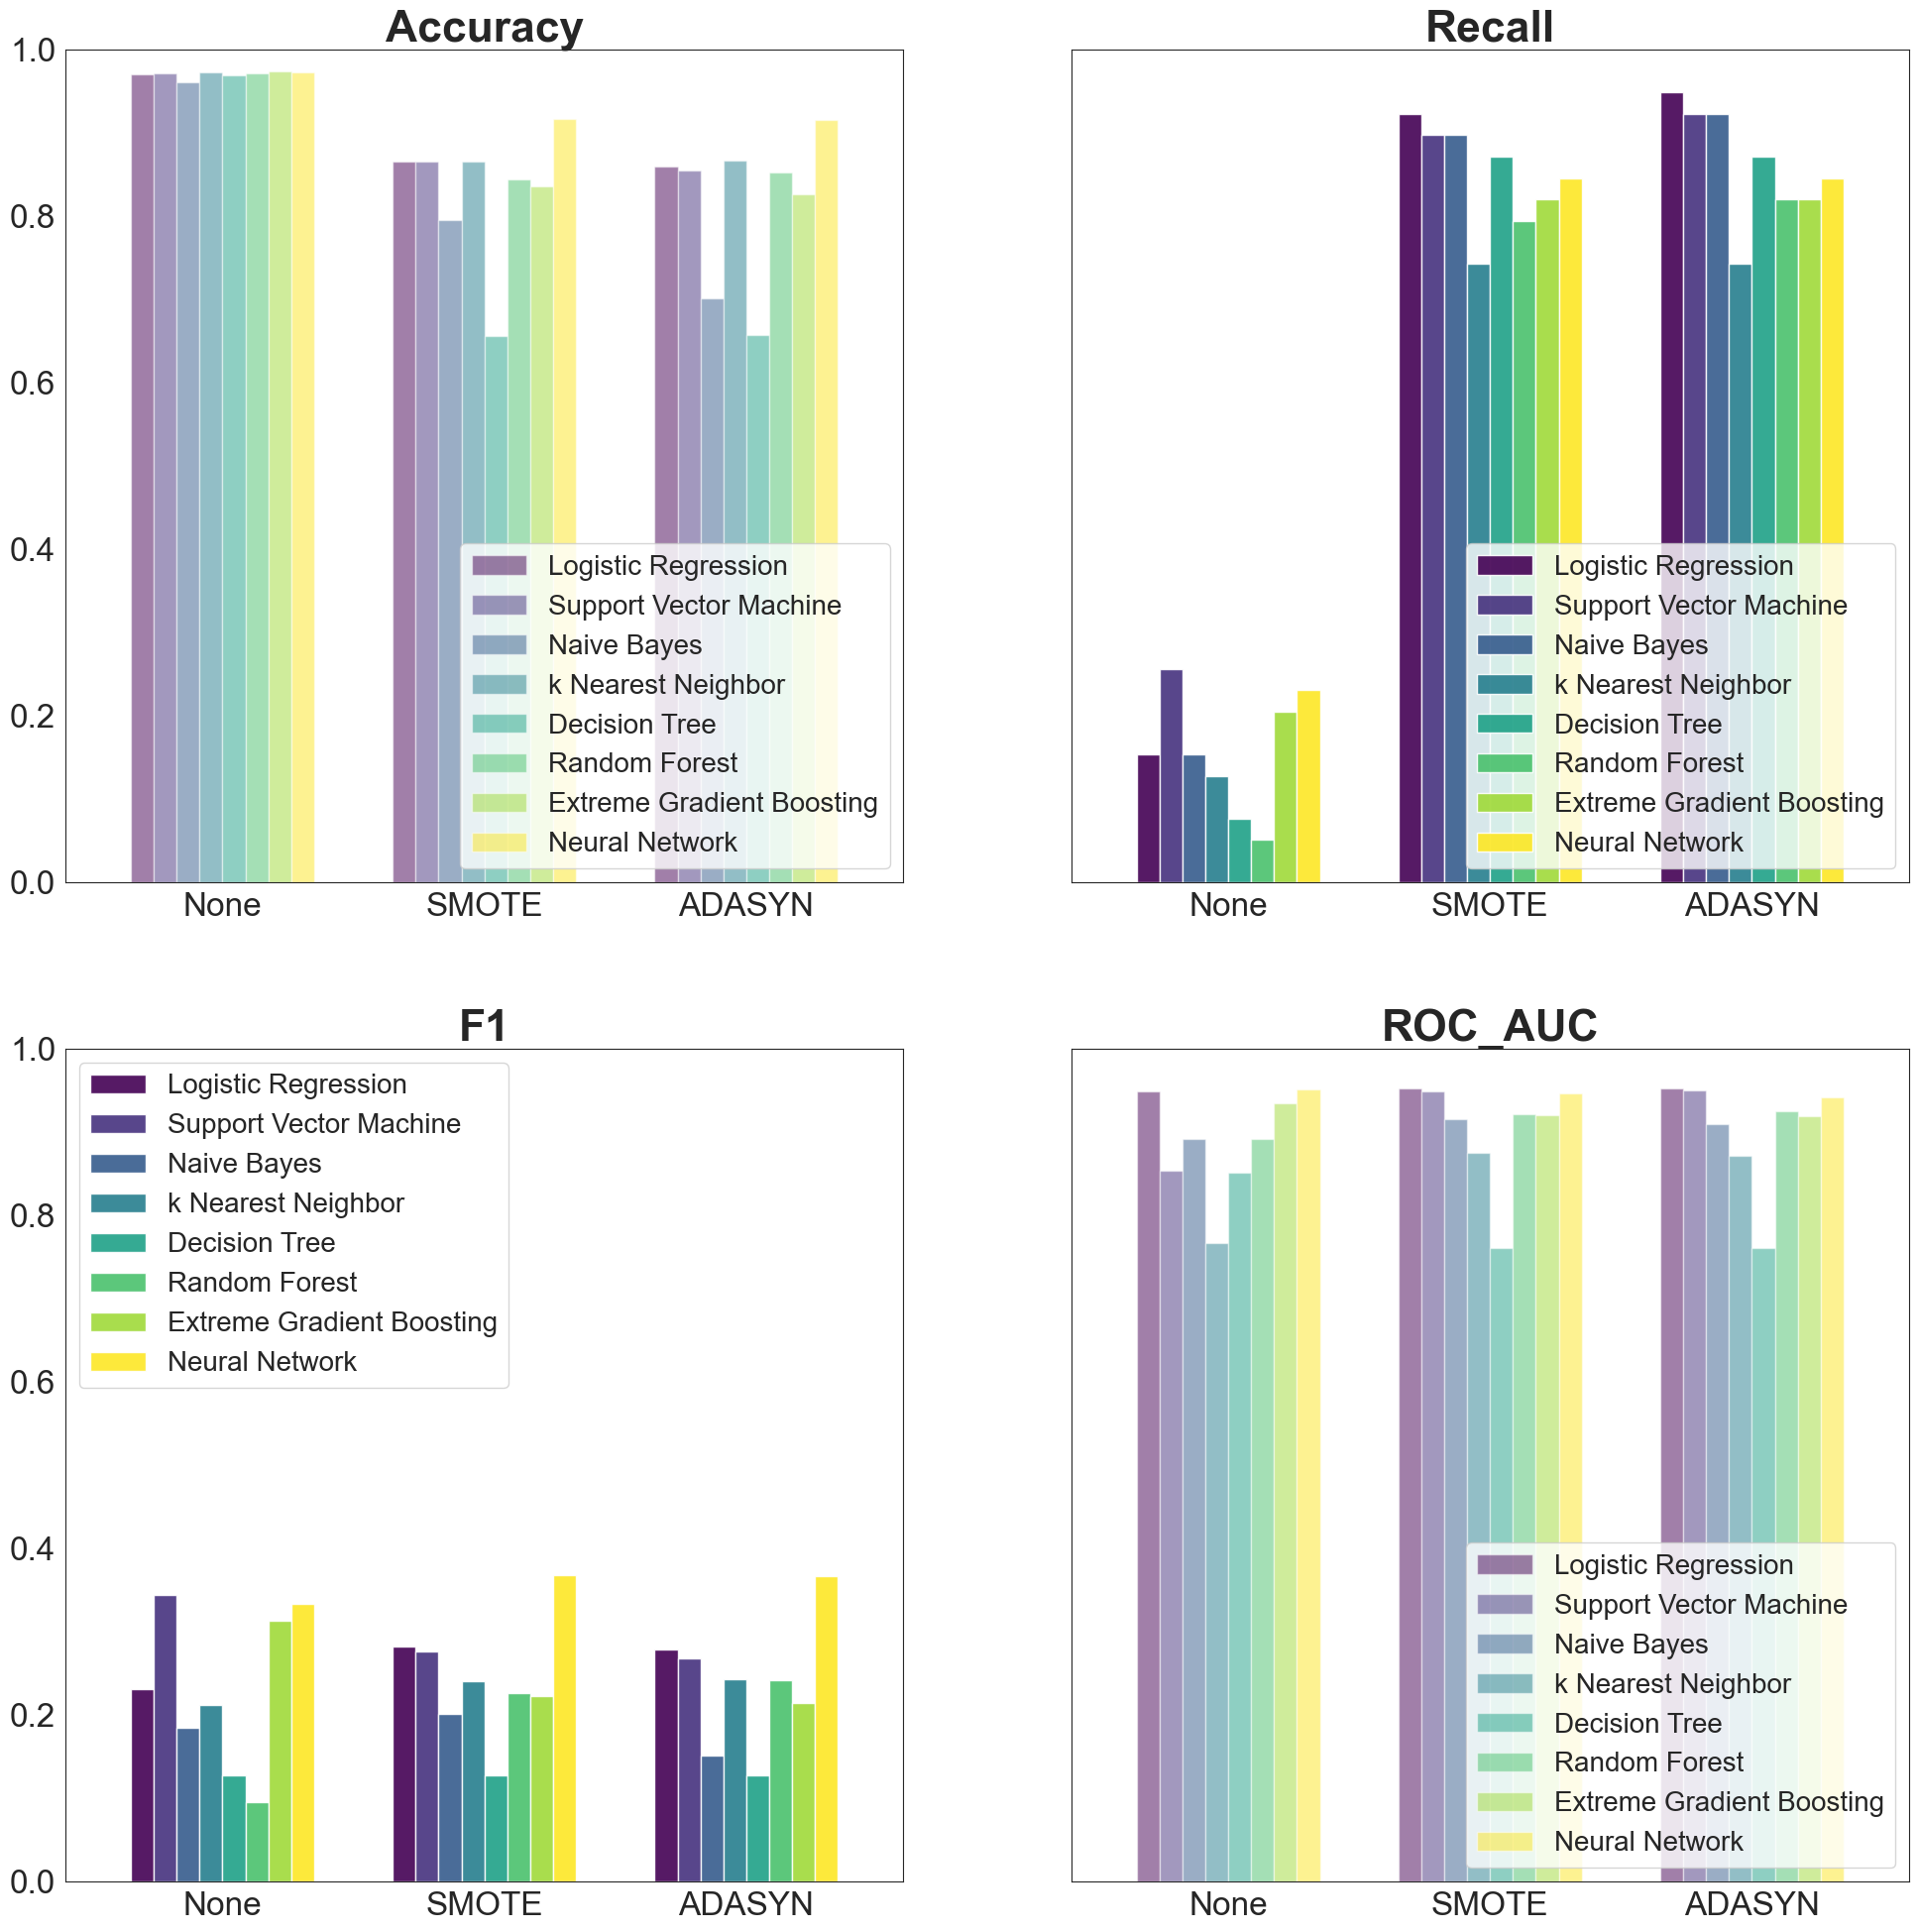

In [65]:
# Plot accuracy, recall, f1 score and roc_auc scores of differnt models:
fig, axs = plt.subplots(2, 2, figsize=(24,24), sharey=True) 
alpha_ls = [0.5, 0.9, 0.9, 0.5]
locations = ['lower right', 'lower right', 'upper left', 'lower right']

for df, score, alpha, loc, ax in zip(score_dfs, ['Accuracy', 'Recall', 'F1', 'ROC_AUC'], alpha_ls, locations, axs.ravel()):
    df.plot.bar(ylim = [0, 1], alpha=alpha, width = 0.7, colormap='viridis', rot=0, ax=ax)
    ax.set_xlabel('')
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    ax.set_title(score, fontdict={'size': 32, 'weight': 'bold'})
    ax.legend(clf_names, fontsize=20, loc = loc);

plt.savefig('mdl_eval.png')

- Note: the scores might be slightly different when running the code again, but the ranking is stable.

<font color='green'>As our first priority is to maximise the recall score, among all classification algorithms, logistic regression is the clear winner. Tree based models, including the ensemble models, generally do not perform well on this dataset.   
<font color='green'>In terms of oversampling approaches, ADASYN works better than SMOTE in most cases but not by a large margin.  
<font color='green'>Oversampling slightly reduces the accuracy score but significantly improve the recall score. Therefore, oversampling is essential in handling imbalanced datasets. Without oversampling the models perform poorly on the minority class. Oversampling does not have a huge impact on the f1 score and roc_auc.      
    
<font color='green'>Since models with a oversampled training set have significantly higher recall scores than that with the orginal (no oversampling) training set. Hence, below we consider only the oversampled models when selecting the top models</font>

Models with 3 highest recall scores:

In [66]:
scores[scores['oversampling'] != 'None'].sort_values('recall', ascending = False).head(3).round(4)

,index,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
2,2,ADASYN,Logistic Regression,0.8594,0.1637,0.9487,0.2792,0.9521
1,1,SMOTE,Logistic Regression,0.8652,0.1667,0.9231,0.2824,0.9524
5,2,ADASYN,Support Vector Machine,0.8557,0.1572,0.9231,0.2687,0.9502


- <font color='green'> Model performance based on the recall score  
    
<font color='green'>Top 3 models:  
<font color='green'>1. __ADASYN + Logistic Regression__  
<font color='green'>2. __SMOTE + Logistic Regression__  
<font color='green'>3. __ADASYN + Support Vector Machine__  

<font color='green'>This table shows that to achive a high recall score, logistic regression has a significant lead over other classifies.</font>

Models with 3 highest f1 scores:

In [67]:
scores[scores['oversampling'] != 'None'].sort_values('f1', ascending = False).head(3).round(4)

,index,oversampling,classifier,accuracy,precision,recall,f1,roc_auc
22,1,SMOTE,Neural Network,0.9168,0.2357,0.8462,0.3687,0.9464
23,2,ADASYN,Neural Network,0.9161,0.2340,0.8462,0.3667,0.9419
1,1,SMOTE,Logistic Regression,0.8652,0.1667,0.9231,0.2824,0.9524


- <font color='green'> Model performance based on the f1 score  
    
<font color='green'>Top 3 models:  
<font color='green'>1. __SMOTE + Neural Network__  
<font color='green'>2. __ADASYN + Neural Network__   
<font color='green'>3. __SMOTE + Logistic Regression__  

<font color='green'>When comparing the f1 score, the neural network model outperform other models by a large margin. A high f1 score also leads to a high accuracy score.</font>

#### 4.2.1 The models with the highest recall and f1 score

Helper function to plot confusion matrix:

In [69]:
def conf_plot(conf):
    conf_names = ['True Negative', 'False Posistive', 'False Negative', 'True Positive']
    conf_counts = ['{0:0.0f}'.format(value) for value in conf.ravel()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(conf_names, conf_counts)]
    labels = np.array(labels).reshape(2,2)
    sns.set(rc={'figure.figsize':(6,6)})
    ax = sns.heatmap(conf, annot = labels, fmt='', cmap = 'Blues', cbar=False, annot_kws={"size": 18})
    ax.set_xlabel('Predicted', fontdict={'size': 18, 'weight': 'bold'})
    ax.set_xticklabels(['No', 'Yes'], fontdict={'size': 14, 'weight': 'bold'})    
    ax.set_ylabel('Actual', fontdict={'size': 18, 'weight': 'bold'})
    ax.set_yticklabels(['No', 'Yes'], fontdict={'size': 14, 'weight': 'bold'})
    ax.set_title('Bankrupt?', fontdict={'size': 18, 'weight': 'bold'})

Confusion matrix of the model with the highest recall score (ADASYN + Logisitic Regression):

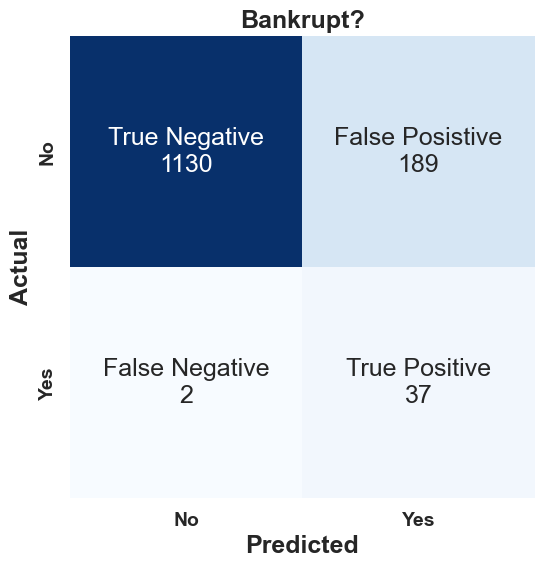

In [70]:
conf_lr_ada = confusion_matrix(y_test, lr_ada.predict(X_test_pca))
conf_plot(conf_lr_ada)
plt.savefig('conf_lr_ada.png')

The precision-recall curve and ROC curve:

Accuracy : 0.8594 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1637 [TP / (TP + FP)] Not to label a negative sample as positive.               Best: 1, Worst: 0
Recall   : 0.9487 [TP / (TP + FN)] Find all the positive samples.                            Best: 1, Worst: 0
F1_score : 0.2792 [Precision * Recall / (Precision + Recall) ]                               Best: 1, Worst: 0
ROC AUC  : 0.9521                                                                            Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


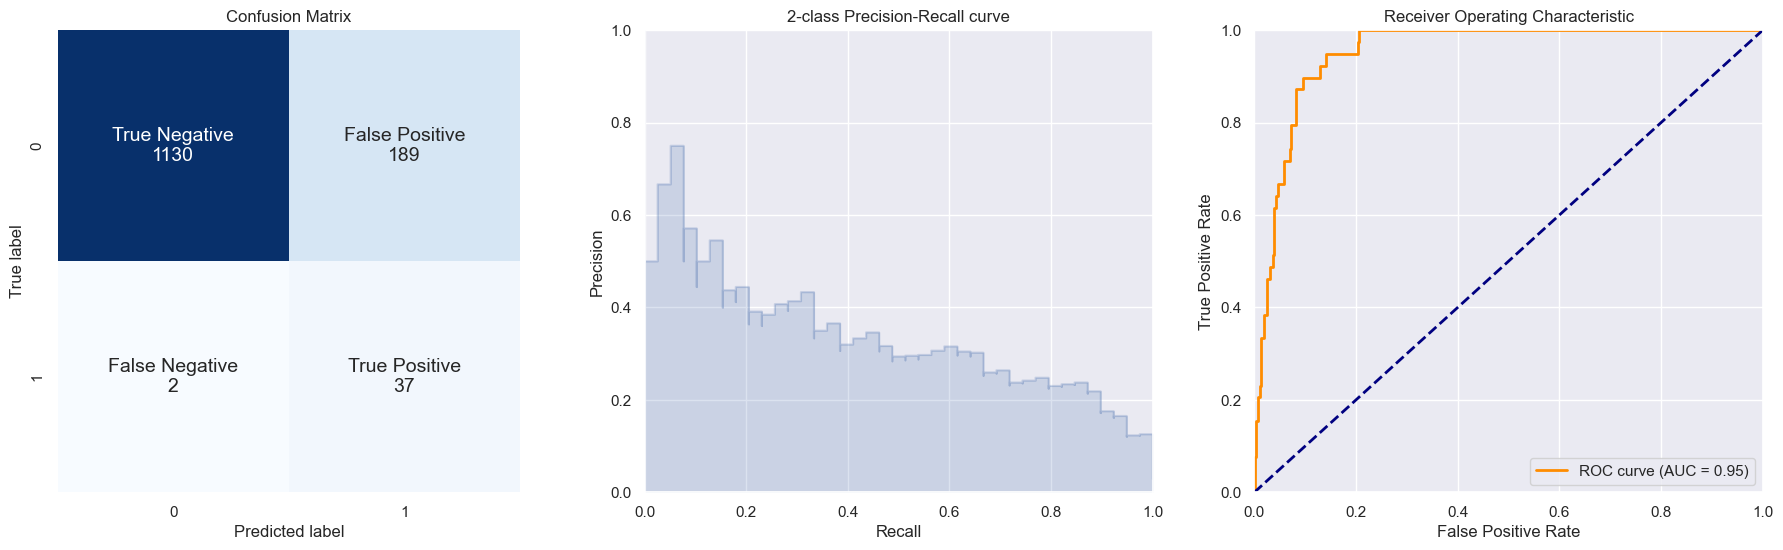

In [71]:
_ = show_summary_report(y_test, lr_ada.predict(X_test_pca), lr_ada.predict_proba(X_test_pca)[:,1], plot = True);
plt.savefig('rep_lr_ada.png')

Confusion matrix of the model with the highest f1 score (SMOTE + Neural Network):

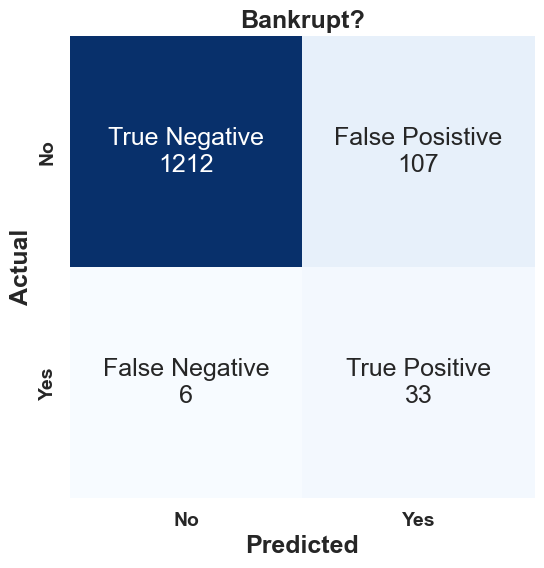

In [72]:
conf_nn_sm = confusion_matrix(y_test, np.argmax(best_pred['SMOTE'], axis=-1))
conf_plot(conf_nn_sm)
plt.savefig('conf_nn_sm.png')

Accuracy : 0.9168 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.2357 [TP / (TP + FP)] Not to label a negative sample as positive.               Best: 1, Worst: 0
Recall   : 0.8462 [TP / (TP + FN)] Find all the positive samples.                            Best: 1, Worst: 0
F1_score : 0.3687 [Precision * Recall / (Precision + Recall) ]                               Best: 1, Worst: 0
ROC AUC  : 0.9464                                                                            Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


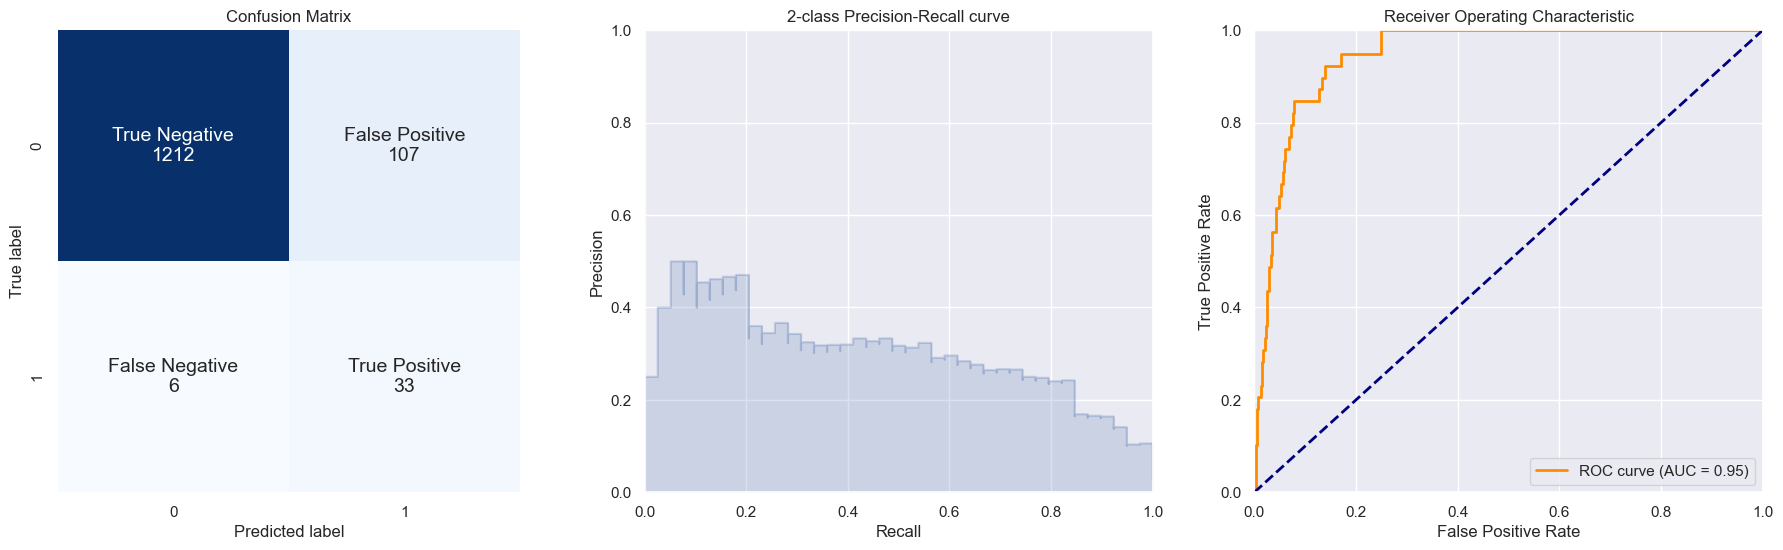

In [73]:
_ = show_summary_report(y_test, np.argmax(best_pred['SMOTE'], axis=-1), best_pred['SMOTE'][:,1], plot = True);
plt.savefig('rep_nn_sm.png')

<font color = 'blue'>The ADASYN + Logistic Regression model gives a recall score of 0.95, with an f1 score of 0.28. This model only misses 2 bankruptcy cases. The SMOTE + Neural Network model misses 6 bankruptcy cases but has much fewer false positive cases (107) than the ADASYN + Logistic Regression model (189), which means ringing fewer false alarms. Each model has its own merits. Both models perform much better than the baseline model Altman z-score. </font>

Learning curve of the model with the highest recall score (ADASYN + Logistic Regression):

In [74]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

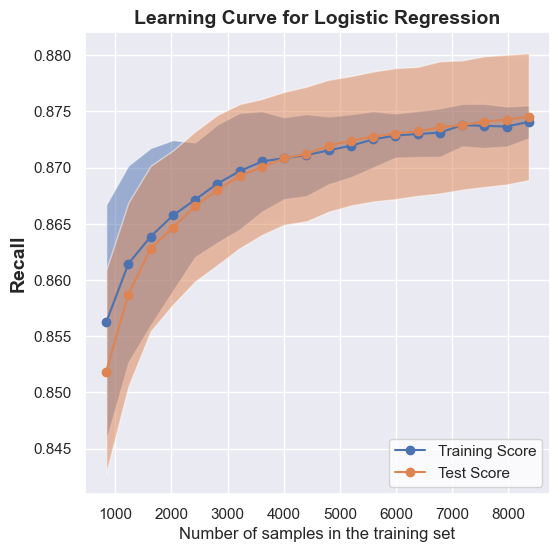

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style('white')

params = {
    'X': X_train_ada,
    'y': y_train_ada,
    'train_sizes': np.linspace(0.1, 1.0, 20),
    'cv': ShuffleSplit(n_splits=50, test_size=0.2, random_state=42),
    'score_type': 'both',
    'n_jobs': -1,
    'line_kw': {'marker': 'o'},
    'std_display_style': 'fill_between',
    'score_name': 'Recall',
}
    
LearningCurveDisplay.from_estimator(lr_ada, **params, ax=ax)
handles, label = ax.get_legend_handles_labels()

ax.legend(handles[:2], ['Training Score', 'Test Score'], loc='lower right')
ax.set_ylabel('Recall', fontdict={'size': 14, 'weight': 'bold'})
ax.set_title('Learning Curve for Logistic Regression', fontdict={'size': 14, 'weight': 'bold'});

plt.savefig('lr_ada_lc.png')

<font color='green'>This learning curve suggests high recall score is not sensitive to the fluctuation of the training data. The model is not overfitted.</font>

Validation curve of the model with the highest f1 score (SMOTE + Neural Network):

In [76]:
hist = pd.DataFrame(best_hist['SMOTE'].history)
hist.tail()

,loss,recall_44,val_loss,val_recall_44
35,0.209466,0.919391,0.244177,0.921503
36,0.209395,0.919391,0.238180,0.923406
37,0.207905,0.914313,0.252860,0.917222
38,0.205321,0.922247,0.241578,0.925785
39,0.204429,0.926373,0.237673,0.925785


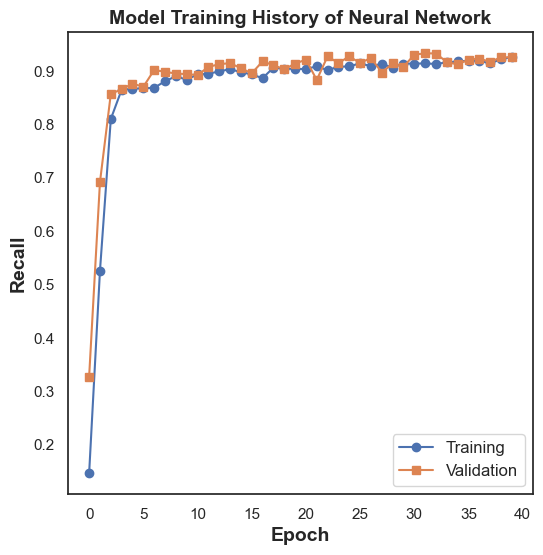

In [78]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style('white')

plt.plot(hist['recall_44'], label = 'Training', marker='o')
plt.plot(hist['val_recall_44'], label = 'Validation', marker='s')
plt.title('Model Training History of Neural Network', fontdict={'size': 14, 'weight': 'bold'})
plt.ylabel('Recall',  fontdict={'size': 14, 'weight': 'bold'})
plt.xlabel('Epoch',  fontdict={'size': 14, 'weight': 'bold'})
plt.legend(fontsize=12, loc = 'lower right');

plt.savefig('nn_ada_ep.png')

<font color='green'>This validation curve also suggests the model does not overfitting the data. The scores are robust.</font>

### 4.2.2 The stacking ensemble

We use the StackingClassifier to see if we can improve the model performance by stacking the three best best models:

In [79]:
from mlxtend.classifier import StackingClassifier

In [80]:
# Model structure
np.random.seed(42)
clf1 = LogisticRegression(max_iter = 2000, random_state = 42)
clf2 = SVC(C=1, kernel = 'linear', probability=True, random_state=42)
clf3 = GaussianNB(var_smoothing = 0.432876)
meta = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
sclf = StackingClassifier(
    classifiers = [clf1, clf2, clf3],
    meta_classifier = meta)

Model fit:

In [81]:
sclf.fit(X_train_ada, y_train_ada)

StackingClassifier(classifiers=[LogisticRegression(max_iter=2000,
                                                   random_state=42),
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42),
                                GaussianNB(var_smoothing=0.432876)],
                   meta_classifier=LogisticRegression())

Model scores:

Accuracy : 0.8557 [(TP + TN) / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.1572 [TP / (TP + FP)] Not to label a negative sample as positive.               Best: 1, Worst: 0
Recall   : 0.9231 [TP / (TP + FN)] Find all the positive samples.                            Best: 1, Worst: 0
F1_score : 0.2687 [Precision * Recall / (Precision + Recall) ]                               Best: 1, Worst: 0
ROC AUC  : 0.9147                                                                            Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


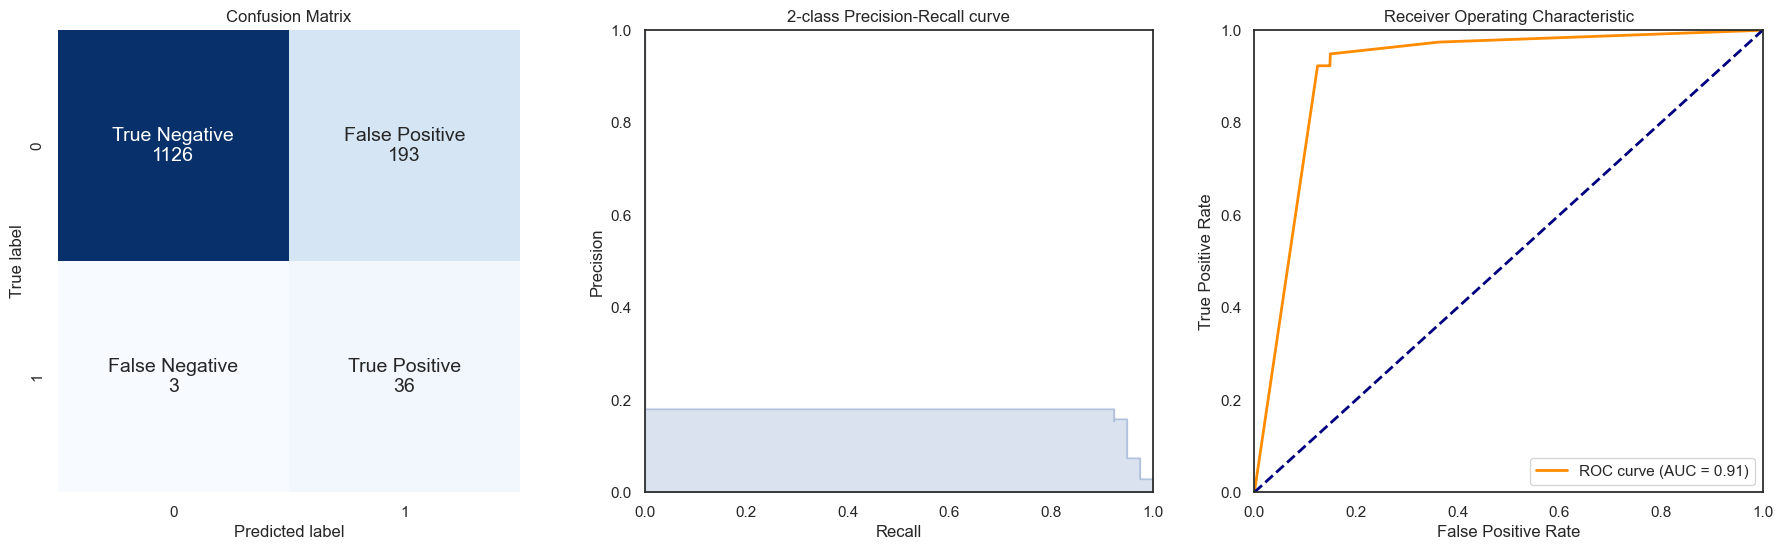

In [82]:
_ = show_summary_report(y_test, sclf.predict(X_test_pca), sclf.predict_proba(X_test_pca)[:,1], plot = True)

<font color='green'> Unfortunately, stacking ensemble fails to improve the model performance.</font>

## __5. Further Insights__

### 5.0 Impact of oversampling ratio

Since we found oversampling will significantly improve the recall score, we investigate the impact of oversampling ratio on the model performance. The ADASYN sampling strategy parameter represents the oversampling ratio, which is between 0 and 1. 0 means no oversampling and 1 means oversampling the minority class to have equal number of instances of the majority class (50% of each class).  

Calculate the scores of different oversampling ratios (ADASYN + Logistic Regression):

In [83]:
sampling = np.arange(0.05, 1.05, 0.05)
samp_scores = pd.DataFrame(columns = ['oversampling', 'Accuracy', 'Precision', 'Recall', 'F1 score'])

for p in sampling:
    ada = ADASYN(sampling_strategy = p, random_state=42)
    X_, y_ = ada.fit_resample(X_train_pca, y_train)
    clf = LogisticRegression(max_iter = 2000, random_state = 42).fit(X_, y_)
    pred = clf.predict(X_test_pca)
    pred_prob = clf.predict_proba(X_test_pca)[:,1]
    accuracy, precision, recall, f1, _ = show_summary_report(y_test, pred, pred_prob)
    results = {'oversampling': p, 'Accuracy': accuracy, 'Precision':precision, 'Recall':recall, 'F1 score': f1}
    samp_scores.loc[len(samp_scores)] = results

samp_scores = samp_scores.set_index('oversampling')

Visualise the scores:

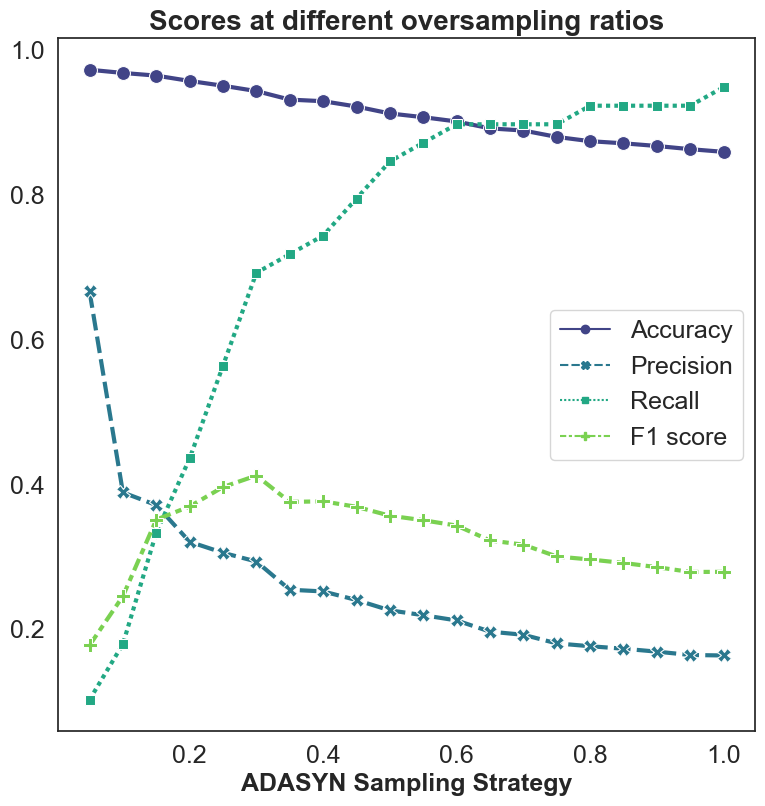

In [84]:
plt.figure(figsize=(9,9))
sns.lineplot(samp_scores, markers=True, linewidth = 3, markersize=10, palette='viridis')
ax = plt.gca()
ax.set_xlabel('ADASYN Sampling Strategy', fontdict={'size': 18, 'weight': 'bold'})
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_title('Scores at different oversampling ratios', fontdict={'size': 20, 'weight': 'bold'})
ax.legend(fontsize=18);

plt.savefig('over.png')

<font color='green'>As the oversampling ratio increases, the recall score increases significantly, but the precision score (True positive / (True Positive + False Positive)) drops as well, which means that oversampling reduces the false negatives at the cost of increasing false positives. It's possible to find a balanced point of oversampling ratio that suits a specific implementation scenario.</font>

### 5.2 Feature Importance

Multiply the PCA component matrix with the vector of the logistic regression coefficients to get a factor for each feature (ADASYN + Logistic Regression):

In [86]:
coefs = lr_ada.coef_
feature_coefs = pca_comp.T@coefs.T

Map the factors to feature names:

In [87]:
feature_importance = pd.DataFrame(feature_coefs)
feature_importance['feature'] = X_train.columns
feature_importance = feature_importance.set_index('feature')
feature_importance.columns = ['Importance']
feature_importance = feature_importance.sort_values('Importance', ascending = False)

Visualise the top 15 important features:

In [88]:
head_15 = feature_importance.head(15)

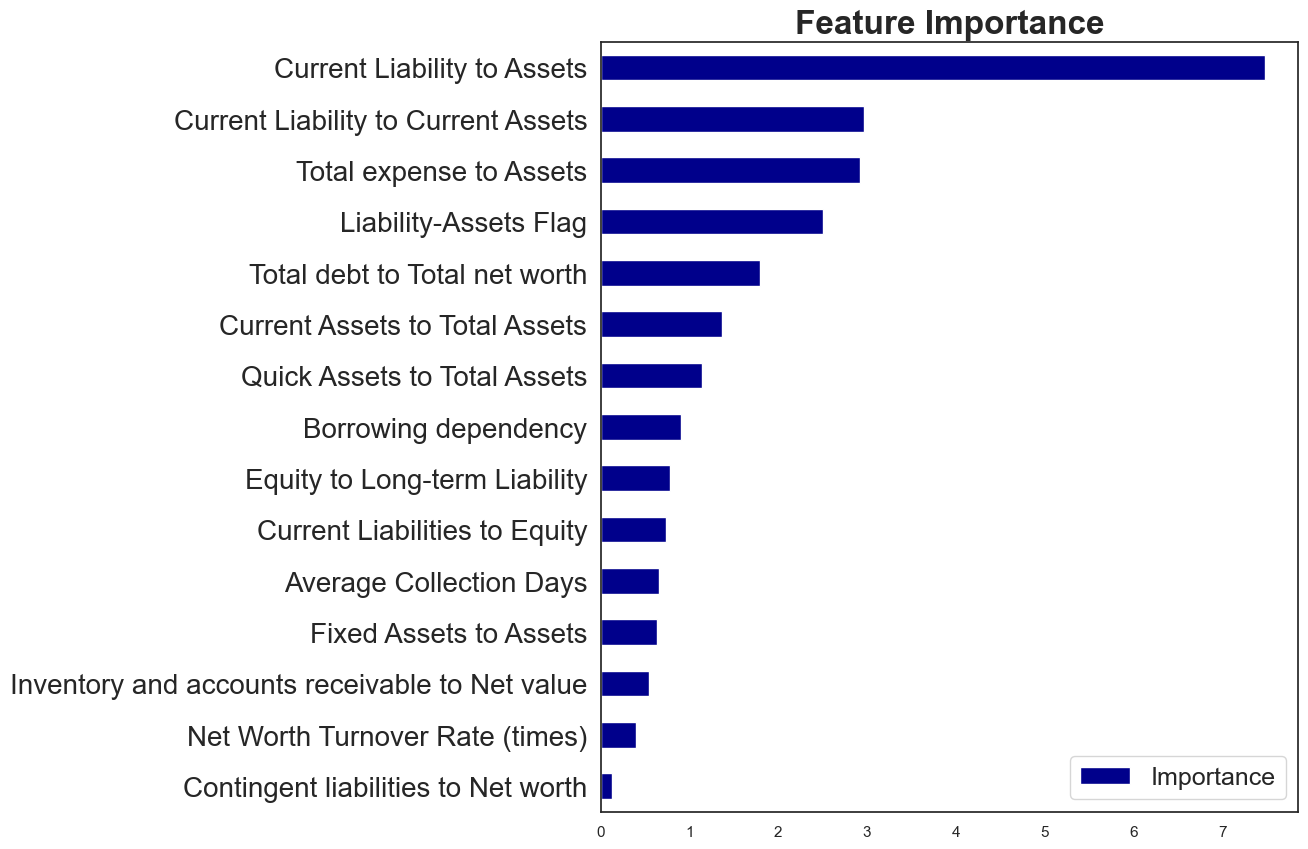

In [89]:
sns.set(rc={'figure.figsize':(9,10)})
sns.set_style('white')

head_15.sort_values('Importance').plot.barh(color='darkblue')
plt.ylabel('')
ax = plt.gca()
ax.yaxis.set_tick_params(labelsize=20)
plt.title('Feature Importance', fontdict={'size': 24, 'weight': 'bold'})
plt.legend(loc='lower right', fontsize=18);

plt.savefig('fet_impo.png', bbox_inches = 'tight')

<font color='green'>The top two features are related to current liability, followed by a ratio of expense and two ratios related to total liability, indicating that the liability and expense ratios are crucial in bankruptcy prediction.</font>

## __6. Conclusion__

In conclusion, among our bankruptcy predicition models, the best model is the Logistic Regression classifier with ADASYN oversampling, which achieves the highest recall of 0.95, with an f1 score of 0.28. The Neural Network model with SMOTE oversampling is also recommendable becaude it performs best in terms of f1 score and makes less false positives. Both models significantly outperform the classical Altman z-score model, and are time efficient. However, the precision score has plenty room for improvement.

Oversampling is essential in handling imbalanced datasets, and the oversampling ratio can be optimized according to certain business needs.

The most important features are mainly related to liability and expense, indicating that the liability and expense ratios are crucial in bankruptcy prediction.

This dataset did not provide the details of the prediction time horizon. A potential next step could be extend this model to predict the likelihood of bankruptcy within different time periods, such as in the next 180 days or next two years. 